In [1]:
from turtle import pd
import cv2
from tensorflow import keras
import pandas as pd
import numpy as np
import glob
from tensorflow import keras
from PIL import Image

# 모델 불러오기

In [2]:
model = keras.models.load_model('../Data/Artist/model/model_46/figure_46_model.h5')

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-03 15:23:32.834396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-03 15:23:32.834538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


---
# train 폴더에서 임의의 파일 하나를 선택하여 크롭 이미지 생성

In [3]:
# 임의의 파일 한개 선택
fileCount = len(glob.glob('../Data/Artist/train/*.jpg'))
rnd_idx = np.random.randint(0, fileCount, size=1)
file_slt = glob.glob('../Data/Artist/train/*.jpg')[rnd_idx[0]]
file_slt

'../Data/Artist/train/84959_01.jpg'

In [4]:
# 원본 파일명 생성
imgfile = file_slt[:file_slt.find('_')].replace('../Data/Artist/train/', '') + '.jpg'

In [5]:
# target 정보 확인
figureData = pd.read_csv('../Data/Artist/model/model_46/figure_46_modelData.csv')
target = [idx for idx in figureData.index if figureData.iloc[idx]['new_filename'] == imgfile]
target

[31]

In [6]:
figureData.head()

,index,Unnamed: 0,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,66867,66867,Ion Pacea,1973.0,abstract,800.0,590.0,519230.0,wikiart,Expressionism,Peisaj de litoral,train_and_test,True,100460.jpg
1,61959,61959,Philip Guston,NaN,figurative,783.0,675.0,97556.0,wikiart,Neo-Expressionism,Talking,train_and_test,True,100826.jpg
2,77276,77276,Antonio Sanfilippo,NaN,abstract,679.0,533.0,633057.0,wikiart,Art Informel,Nero e Rosso (Schermo astratto 28/55),train_and_test,True,14702.jpg
3,74718,74718,Jusepe de Ribera,1642,religious painting,550.0,716.0,15243.0,wikiart,Tenebrism,The Deliverence of St. Peter from Prison,train_and_test,True,1772.jpg
4,63106,63106,William Hogarth,1729,genre painting,800.0,643.0,85734.0,wikiart,Rococo,A Scene from the Beggar's Opera,train_and_test,False,18034.jpg


In [7]:
# #플래그를 이용한 동그라미 그리기

# import cv2

# title = '이미지 회손'
# img = cv2.imread(file_slt)
# cv2.imshow(title, img)

# colors = {'black':(0,0,0), 'red':(0,0,255), 'blue':(255,0,0), 'green':(0,255,0)}

# def onMouse(event, x, y, flags, praram):
#     #print(event, x, y, flags)
#     color = colors['black']
#     if event == cv2.EVENT_FLAG_LBUTTON:        # 왼쪽 버튼을 누른 경우
#         if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY: # 컨트롤 키와 시프트 키를 모두 누른 경우
#             color = colors['green']
#         elif flags & cv2.EVENT_FLAG_SHIFTKEY : # 시프트 키를 누른 경우
#             color = colors['blue']
#         elif flags & cv2.EVENT_FLAG_CTRLKEY:   # 컨트롤 키를 누른 경우
#             color = colors['red']
#         cv2.circle(img, (x,y), 40, color, -1)
#         cv2.imshow(title, img)
# cv2.setMouseCallback(title, onMouse)

# while True:
#     if cv2.waitKey(0) & 0xFF == 27:
#         cv2.imwrite('../Data/Artist/test_img/test_img.jpg', img) # 회손한 이미지 저장
#         break
# cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np 

click = False     # Mouse 클릭된 상태 (false = 클릭 x / true = 클릭 o) : 마우스 눌렀을때 true로, 뗏을때 false로
x1,y1 = -1,-1

# Mouse Callback함수 : 파라미터는 고정됨.
def draw_rectangle(event, x, y, flags, param):
    global x1,y1, click                                     # 전역변수 사용

    if event == cv2.EVENT_LBUTTONDOWN:                      # 마우스를 누른 상태
        click = True 
        x1, y1 = x,y
    

    elif event == cv2.EVENT_LBUTTONUP and click == True:
        click = False;                                      # 마우스를 때면 상태 변경
        cv2.rectangle(img,(x1,y1),(x,y),(255,0,0), 10)

        imgOrg = cv2.imread(file_slt)
        max_height, max_width = imgOrg.shape[0:2]

        imgCrop = imgOrg[y1:y, x1:x]
        height, width = imgCrop.shape[:2]

        # dy = (max_height - height) // 2
        # dx = (max_width - width) // 2

        dx = x1
        dy = y1

        
        mtrx = np.float32([[1,0,dx],[0,1,dy]])
        imgCrop = cv2.warpAffine(imgCrop, mtrx, (max_width,max_height))
        cv2.imwrite('../Data/Artist/test_img/test_img.jpg', imgCrop )
        



# 캔버스, MouseCallback 함수 설정
img = cv2.imread(file_slt)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_rectangle)                # 마우스 이벤트 후 callback 수행하는 함수 지정

# main문 : 키보드로 esc를 받을때까지 화면을 계속 보여준다.
while True:
    cv2.imshow('image', img)    # 화면을 보여준다.

    k = cv2.waitKey(1) & 0xFF   # 키보드 입력값을 받고
        
    if k == 27:               # esc를 누르면 종료
        break

cv2.destroyAllWindows()

---
# 회손한 이미지를 읽어서 학습 모델에서 확인

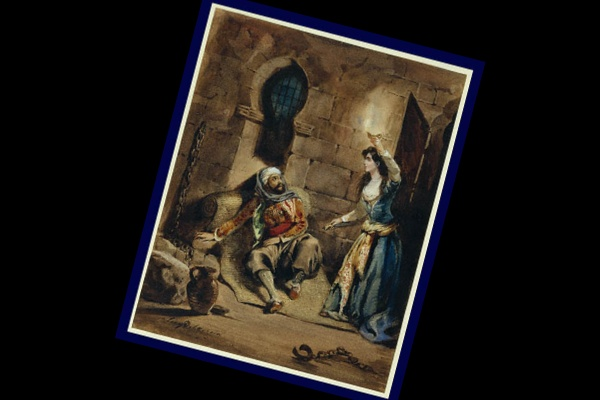

In [9]:
img_org = Image.open(file_slt)
img_org

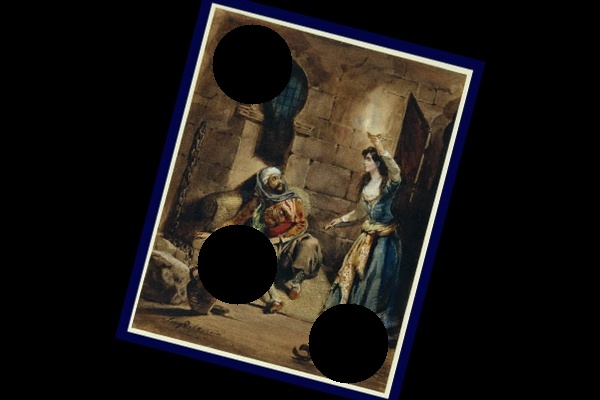

In [10]:
img_test = (Image.open('../Data/Artist/test_img/test_img.jpg'))
img_test

In [11]:
scaled = np.array(img_test).reshape(-1, 400, 600, 3) / 255.0

In [12]:
pred = model.predict(scaled)

2022-08-03 15:23:38.020258: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-03 15:23:38.063462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 281ms/step


In [13]:
np.argmax(pred)

31

In [14]:
# 예측결과가 맞는지 확인
np.argmax(pred) == target[0]

True

In [15]:
scores = np.array(pred).flatten()
[id for id in range(len(scores)) if scores[id] > 0.1]

[31]

In [16]:
target

[31]